# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Suppress Warnings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [ ]:
data=pd.read_csv("Dry_Bean_Dataset1111.csv")

# Displaying some of the rows in the dataset

In [ ]:
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


# Summary statistics

In [ ]:
print(data.describe())

                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.

# Check for missing values

In [ ]:
print(data.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [ ]:
X = data.drop('Class', axis=1)
y = data['Class']

# Encoding the target variable

In [ ]:
le = LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])

# Splitting the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Bar plot for class distribution

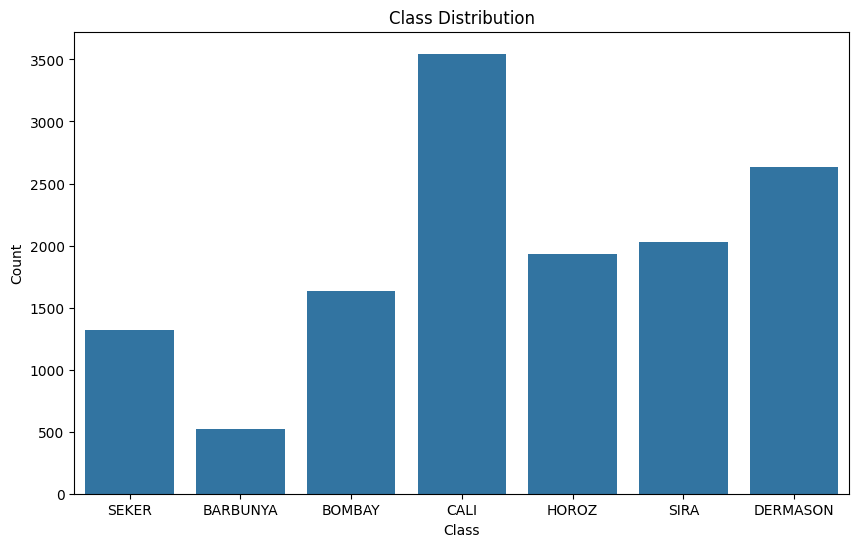

In [ ]:
class_names = le.inverse_transform(data['Class'].unique())
class_counts = data['Class'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=class_counts)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Box plot for feature distributions

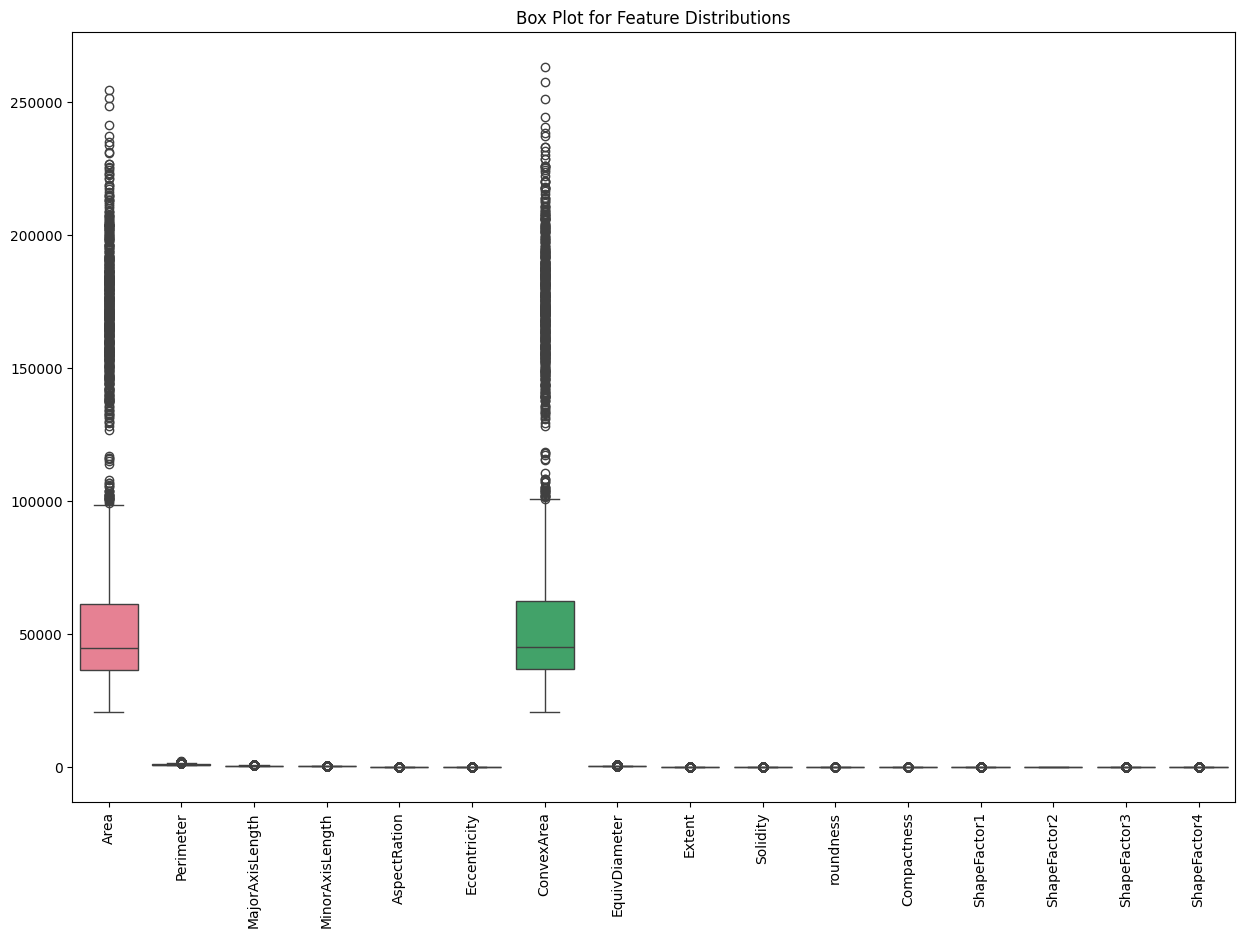

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.drop('Class', axis=1))
plt.title('Box Plot for Feature Distributions')
plt.xticks(rotation=90)
plt.show()

# Initializing the Random Forest Classifier

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model

In [ ]:
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

# Predicting on the test set

In [ ]:
y_pred = model.predict(X_test_scaled)

# Evaluating the model

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       395
           1       1.00      1.00      1.00       161
           2       0.92      0.93      0.93       479
           3       0.90      0.93      0.92      1043
           4       0.96      0.95      0.96       588
           5       0.94      0.93      0.94       619
           6       0.88      0.88      0.88       799

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084

Confusion Matrix:
 [[355   0  27   0   1   2  10]
 [  0 161   0   0   0   0   0]
 [ 19   0 446   0   9   2   3]
 [  0   0   0 967   2  18  56]
 [  2   0   9   4 560   0  13]
 [  4   0   0  24   0 578  13]
 [  0   0   1  74   9  14 701]]


# Confusion Matrix(detailed)

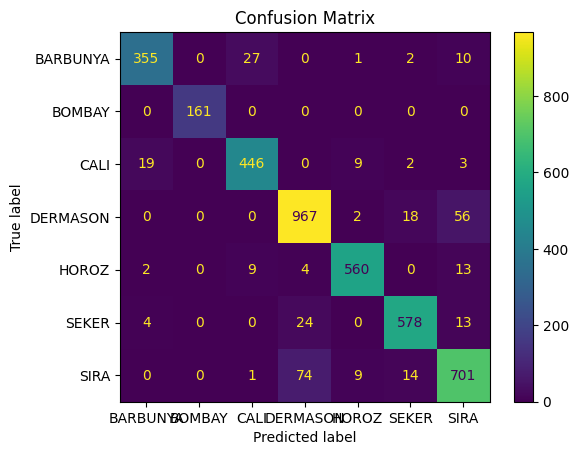

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()

# Testing on Sample Data from the Same Dataset


In [ ]:
sample_data = X_test.sample(n=5, random_state=42)
sample_data_scaled = scaler.transform(sample_data)

# Predicting on sample data and converting the predictions back to original class labels

In [ ]:

sample_predictions = model.predict(sample_data_scaled)
sample_predictions_labels = le.inverse_transform(sample_predictions)


# Displaying the predictions

In [ ]:
print("Predictions for sample data:\n", sample_predictions_labels)
print("Actual classes for sample data:\n", le.inverse_transform(y_test.loc[sample_data.index]))

Predictions for sample data:
 ['BARBUNYA' 'HOROZ' 'HOROZ' 'SEKER' 'SEKER']
Actual classes for sample data:
 ['BARBUNYA' 'HOROZ' 'HOROZ' 'SEKER' 'SEKER']
